In [8]:
import pandas as pd
import nltk as nltk

tweets=pd.read_csv('C:/Users/Aishwarya/OneDrive/Desktop/Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets_df=tweets.drop(tweets[tweets['airline_sentiment_confidence']<0.5].index,axis=0)

tweets_df.shape

(14404, 15)

In [5]:
#Data preprocessing
X=tweets_df['text']
y=tweets_df['airline_sentiment']

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [14]:
import re
cleaned_data=[]
for i in range(len(X)):
    tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
    tweet=tweet.lower().split()
    tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words)]
    tweet=' '.join(tweet)
    cleaned_data.append(tweet)

print(cleaned_data)

['virginamerica dhepburn said', 'virginamerica today must mean need take anoth trip', 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours', 'virginamerica realli big bad thing', 'virginamerica serious would pay flight seat play realli bad thing fli va', 'virginamerica ye nearli everi time fli vx ear worm go away', 'virginamerica realli miss prime opportun men without hat parodi http co mwpg grezp', 'virginamerica well', 'virginamerica amaz arriv hour earli good', 'virginamerica know suicid second lead caus death among teen', 'virginamerica lt pretti graphic much better minim iconographi', 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p', 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn', 'virginamerica thank', 'virginamerica sfo pdx schedul still mia', 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo', 'virginamerica flew 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_fin=cv.fit_transform(cleaned_data).toarray()

In [18]:
sentiment_ordering=['negative','neutral','positive']
y=y.apply(lambda x: sentiment_ordering.index(x))

In [19]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_fin,y,test_size=0.3)
model.fit(X_train,y_train)

MultinomialNB()

In [24]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2741
           1       0.61      0.50      0.55       915
           2       0.70      0.70      0.70       666

    accuracy                           0.77      4322
   macro avg       0.72      0.70      0.70      4322
weighted avg       0.77      0.77      0.77      4322



In [30]:
#Visualizations

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

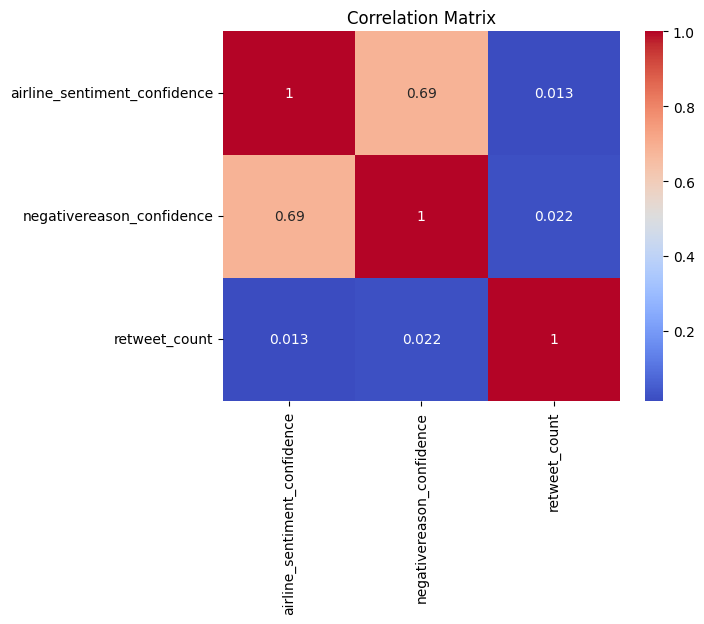

In [34]:
correlation_matrix = tweets[['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
sentiment_conf_stats = tweets['airline_sentiment_confidence'].describe()
print(sentiment_conf_stats)

count    14640.000000
mean         0.900169
std          0.162830
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64


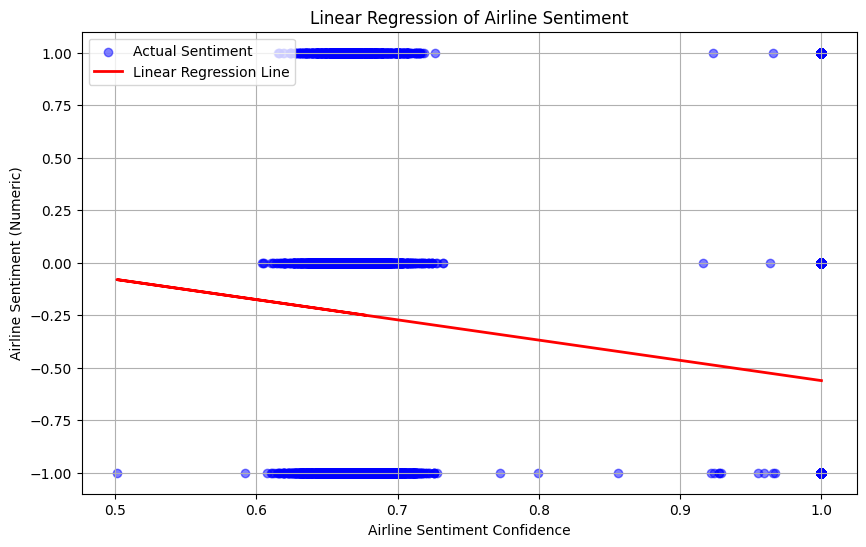

In [43]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
tweets_df['airline_sentiment_numeric'] = tweets_df['airline_sentiment'].map(sentiment_mapping)

X_reg = tweets_df[['airline_sentiment_confidence']]  # You can choose other numerical features if available
y_reg = tweets_df['airline_sentiment_numeric']

reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)

y_reg_pred = reg_model.predict(X_reg)

plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, color='blue', label='Actual Sentiment', alpha=0.5)
plt.plot(X_reg, y_reg_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression of Airline Sentiment')
plt.xlabel('Airline Sentiment Confidence')
plt.ylabel('Airline Sentiment (Numeric)')
plt.legend()
plt.grid()
plt.show()